In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import accuracy_score, classification_report

### Dataset

Bock, R. (2004). MAGIC Gamma Telescope [Dataset]. UCI Machine Learning Repository. https://doi.org/10.24432/C52C8B.

In [6]:
cols = [
    "fLength",
    "fWidth",
    "fSize",
    "fConc",
    "fConc1",
    "fAsym",
    "fM3Long",
    "fM3Trans",
    "fAlpha",
    "fDist",
    "class",
]
df = pd.read_csv('magic04.data', names=cols)
df.head()

fLength    fWidth   fSize   fConc  fConc1     fAsym  fM3Long  fM3Trans  \
0   28.7967   16.0021  2.6449  0.3918  0.1982   27.7004  22.0110   -8.2027   
1   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238   -9.9574   
2  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580  -45.2160   
3   23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633   -7.1513   
4   75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525   21.8393   

    fAlpha     fDist class  
0  40.0920   81.8828     g  
1   6.3609  205.2610     g  
2  76.9600  256.7880     g  
3  10.4490  116.7370     g  
4   4.6480  356.4620     g

In [7]:
df.shape

(19020, 11)

In [8]:
df['class'].unique()

array(['g', 'h'], dtype=object)

In [9]:
df['class'] = (df['class'] == 'g').astype(int) #if equal 'g' change to 1, else is 0 (h)
df

fLength    fWidth   fSize   fConc  fConc1     fAsym   fM3Long  \
0       28.7967   16.0021  2.6449  0.3918  0.1982   27.7004   22.0110   
1       31.6036   11.7235  2.5185  0.5303  0.3773   26.2722   23.8238   
2      162.0520  136.0310  4.0612  0.0374  0.0187  116.7410  -64.8580   
3       23.8172    9.5728  2.3385  0.6147  0.3922   27.2107   -6.4633   
4       75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277   28.5525   
...         ...       ...     ...     ...     ...       ...       ...   
19015   21.3846   10.9170  2.6161  0.5857  0.3934   15.2618   11.5245   
19016   28.9452    6.7020  2.2672  0.5351  0.2784   37.0816   13.1853   
19017   75.4455   47.5305  3.4483  0.1417  0.0549   -9.3561   41.0562   
19018  120.5135   76.9018  3.9939  0.0944  0.0683    5.8043  -93.5224   
19019  187.1814   53.0014  3.2093  0.2876  0.1539 -167.3125 -168.4558   

       fM3Trans   fAlpha     fDist  class  
0       -8.2027  40.0920   81.8828      1  
1       -9.9574   6.3609  205.2610      1  
2      -45.2160  76.9600  256.7880      1  
3       -7.1513  10.4490  116.7370      1  
4       21.8393   4.6480  356.4620      1  
...         ...      ...       ...    ...  
19015    2.8766   2.4229  106.8258      0  
19016   -2.9632  86.7975  247.4560      0  
19017   -9.4662  30.2987  256.5166      0  
19018  -63.8389  84.6874  408.3166      0  
19019   31.4755  52.7310  272.3174      0  

[19020 rows x 11 columns]

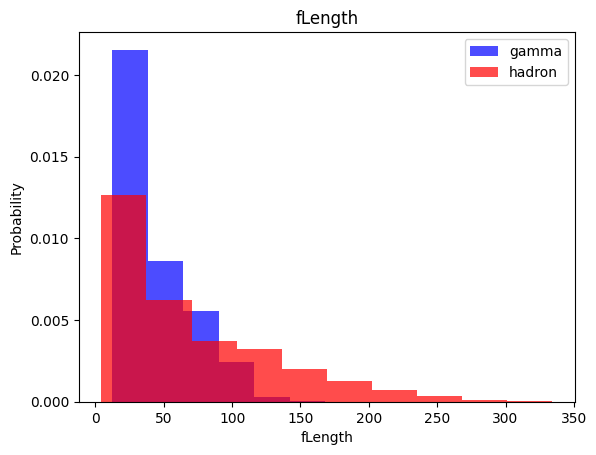

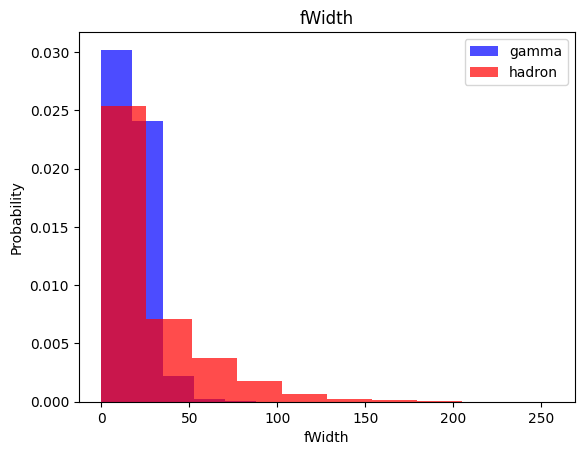

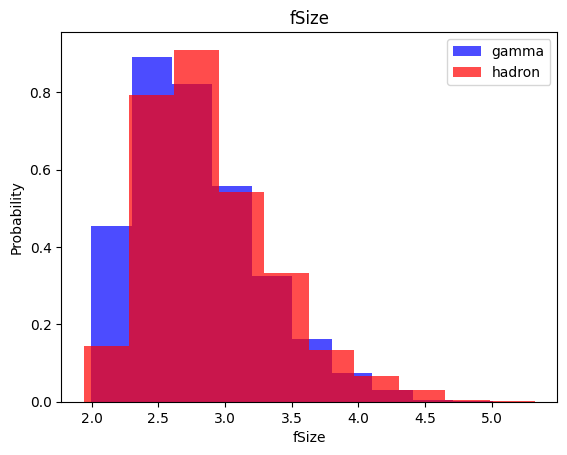

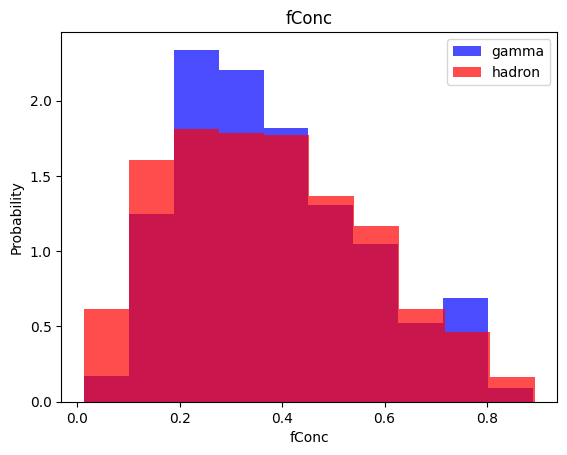

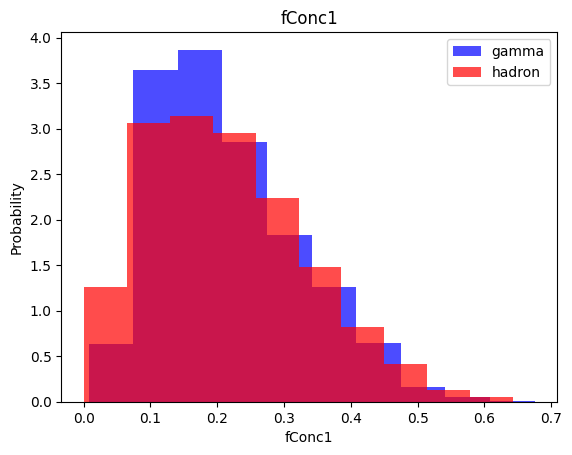

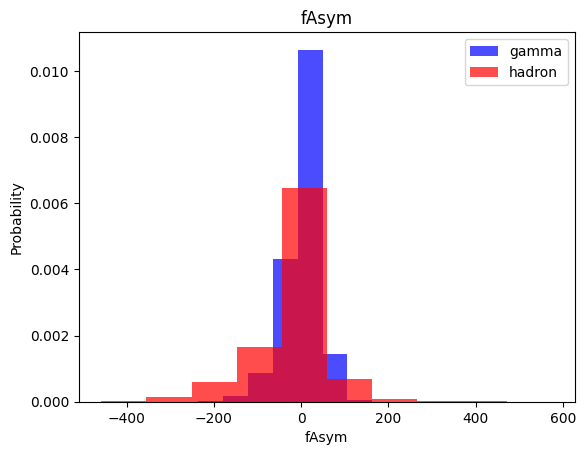

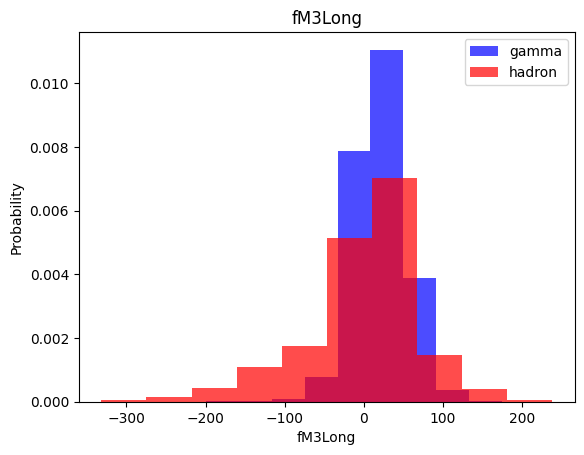

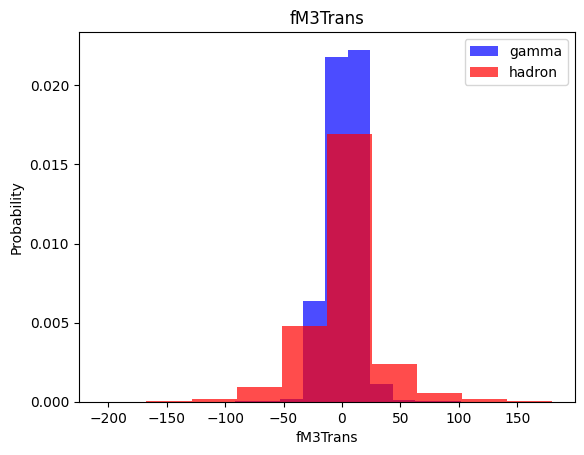

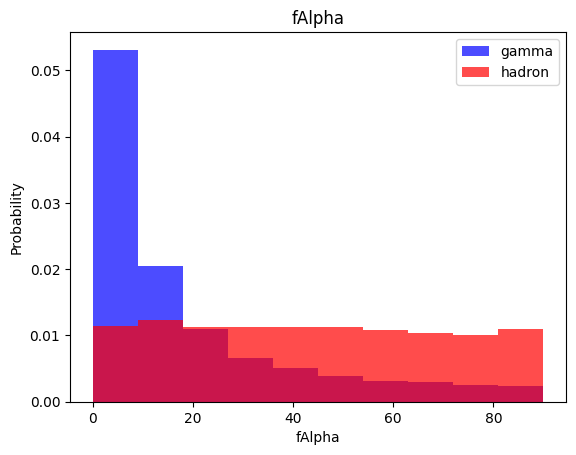

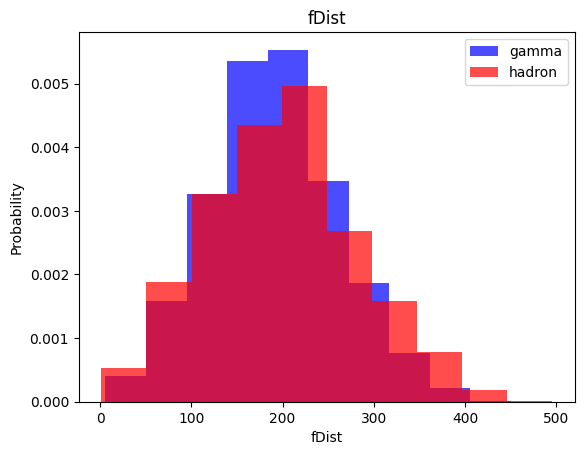

In [10]:
for label in cols[:-1]:
    plt.hist(df[df['class']==1][label], color='blue',label='gamma',alpha=0.7,density=True)
    plt.hist(df[df['class']==0][label], color='red',label='hadron',alpha=0.7,density=True)
    plt.title(label)
    plt.ylabel('Probability')
    plt.xlabel(label)
    plt.legend()
    plt.show()

When we look at the histogram above, it helps us see how gamma rays and hadrons contrast with each other, especially in the fLength, fAsym, fM3Long, and fAlpha columns.

In [11]:
train, valid, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])
#0.6 is 60% for training, int(0.6 * len(df)) = index where the training set ends
# 0.8 is 60-80% is for validation, int(0.8 * len(df)) = index where the validation set ends
# the rest is for testing (80-100%)

/Users/es/Library/Python/3.9/lib/python/site-packages/numpy/_core/fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [12]:
print(len(train[train['class']==1]))
print(len(train[train['class']==0]))
# print(len(train['class']==0)) #get total
# print("all colums",train[train['class']==1])
# print("only class colum",train['class']==1)

7408
4004


In [13]:
# df[df.columns[-1]]
# df[df.columns[-1]].values
# np.reshape(df[df.columns[-1]].values, (-1,1)) #-1 = free, depend on dataset, 1 = 1 data
# df[df.columns[:-1]].values

In [14]:
def scale_dataset(dataframe, oversample = False):
    X = dataframe[dataframe.columns[:-1]].values
    y = dataframe[dataframe.columns[-1]].values

    scaler = StandardScaler()
    X = scaler.fit_transform(X)

    if oversample:
        ros = RandomOverSampler() #can handdle imbalance 
        X, y = ros.fit_resample(X,y) 

    data = np.hstack((X, np.reshape(y, (-1,1))))

    return data, X, y

In [15]:
train, X_train, y_train = scale_dataset(train, oversample=True) #help model learn better from minority class
valid, X_valid, y_valid = scale_dataset(valid, oversample=False) #need to validate with realistic data
test, X_test, y_test = scale_dataset(test, oversample=False) #need to test with realistic data

### KNN Model

In [16]:
from sklearn.neighbors import KNeighborsClassifier

In [17]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train,y_train)

KNeighborsClassifier()

In [18]:
y_pred = knn_model.predict(X_test)

In [19]:
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.74      0.74      0.74      1346
           1       0.86      0.86      0.86      2458

    accuracy                           0.82      3804
   macro avg       0.80      0.80      0.80      3804
weighted avg       0.82      0.82      0.82      3804

0.8151945320715037


### Naive Bayes

In [20]:
from sklearn.naive_bayes import GaussianNB

In [21]:
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

GaussianNB()

In [22]:
y_pred = nb_model.predict(X_test)

In [23]:
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.70      0.41      0.52      1346
           1       0.74      0.90      0.81      2458

    accuracy                           0.73      3804
   macro avg       0.72      0.66      0.67      3804
weighted avg       0.72      0.73      0.71      3804

0.729758149316509


### Logistics Regression

In [24]:
from sklearn.linear_model import LogisticRegression

In [25]:
lg_model = LogisticRegression()
lg_model.fit(X_train, y_train)

LogisticRegression()

In [26]:
y_pred = lg_model.predict(X_test)

In [27]:
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.69      0.72      0.71      1346
           1       0.84      0.82      0.83      2458

    accuracy                           0.79      3804
   macro avg       0.77      0.77      0.77      3804
weighted avg       0.79      0.79      0.79      3804

0.785751840168244


### SVM

In [28]:
from sklearn.svm import SVC

In [29]:
svm_model = SVC()
svm_model.fit(X_train,y_train)

SVC()

In [30]:
y_pred = svm_model.predict(X_test)

In [31]:
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.80      0.80      1346
           1       0.89      0.89      0.89      2458

    accuracy                           0.86      3804
   macro avg       0.84      0.84      0.84      3804
weighted avg       0.86      0.86      0.86      3804

0.8564668769716088


### Neural Network

In [32]:
import tensorflow as tf

/Users/es/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [33]:
nn_model = tf.keras.Sequential([
    tf.keras.layers.Dense(32, activation='relu', input_shape=(10,)),
     tf.keras.layers.Dense(32, activation='relu'),
      tf.keras.layers.Dense(1, activation='sigmoid'),
])

/Users/es/Library/Python/3.9/lib/python/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [34]:
nn_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [ ]:
def plot_loss(history):
    plt.figure(figsize=(6, 4))
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')    
    plt.xlabel('Epoch')
    plt.ylabel('Binary crossentropy')
    plt.legend()
    plt.grid(True)
    plt.show()


def plot_accuracy(history):
    plt.figure(figsize=(6, 4))
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)
    plt.show()


In [36]:
history = nn_model.fit(
    X_train,y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=0
)

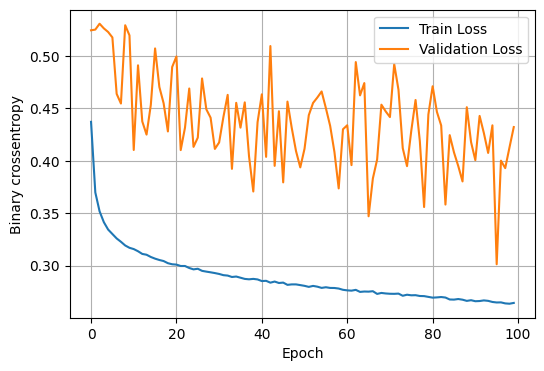

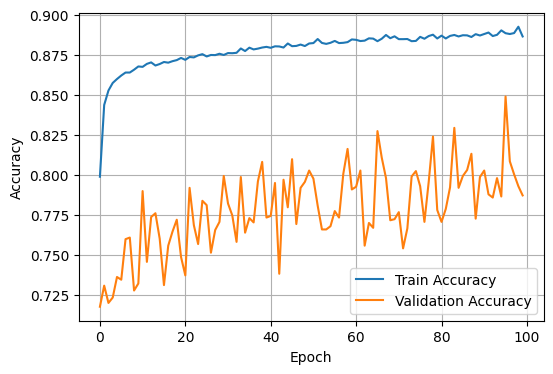

In [37]:
plot_loss(history)
plot_accuracy(history)

In [63]:
def train_model(X_train, y_train, num_nodes, dropout_prop, lr, batch_size, epochs):
    nn_model = tf.keras.Sequential([
    tf.keras.layers.Dense(num_nodes, activation='relu', input_shape=(10,)),
    tf.keras.layers.Dropout(dropout_prop),
    tf.keras.layers.Dense(num_nodes, activation='relu'),
    tf.keras.layers.Dropout(dropout_prop),
    tf.keras.layers.Dense(1, activation='sigmoid'),
])
    
    nn_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=lr),
    loss='binary_crossentropy',
    metrics=['accuracy']
)
    history = nn_model.fit(
    X_train,y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2, verbose=0
)
    return nn_model, history

def plot_history(history):
    fig, (ax1, ax2) =   plt.subplots(1,2, figsize = (12,8))
    ax1.plot(history.history['loss'], label='Train Loss')
    ax1.plot(history.history['val_loss'], label='Validation Loss')    
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Binary crossentropy')
    ax1.grid(True)

    ax2.plot(history.history['accuracy'], label='Train Accuracy')
    ax2.plot(history.history['val_accuracy'], label='Validation Accuracy')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Accuracy')
    ax2.grid(True)

    plt.legend()
    plt.show()

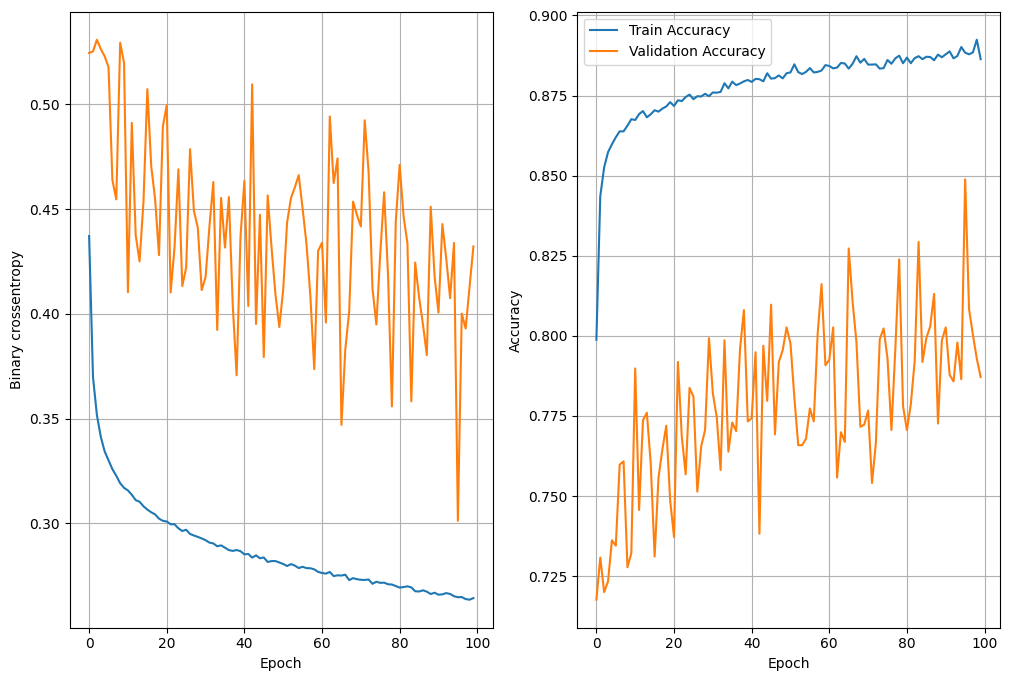

In [64]:
plot_history(history)

In [65]:
least_val_model = float('inf')
least_val_model

inf

16 nodes, dropout 0, lr 0.01, batch size 32


/Users/es/Library/Python/3.9/lib/python/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


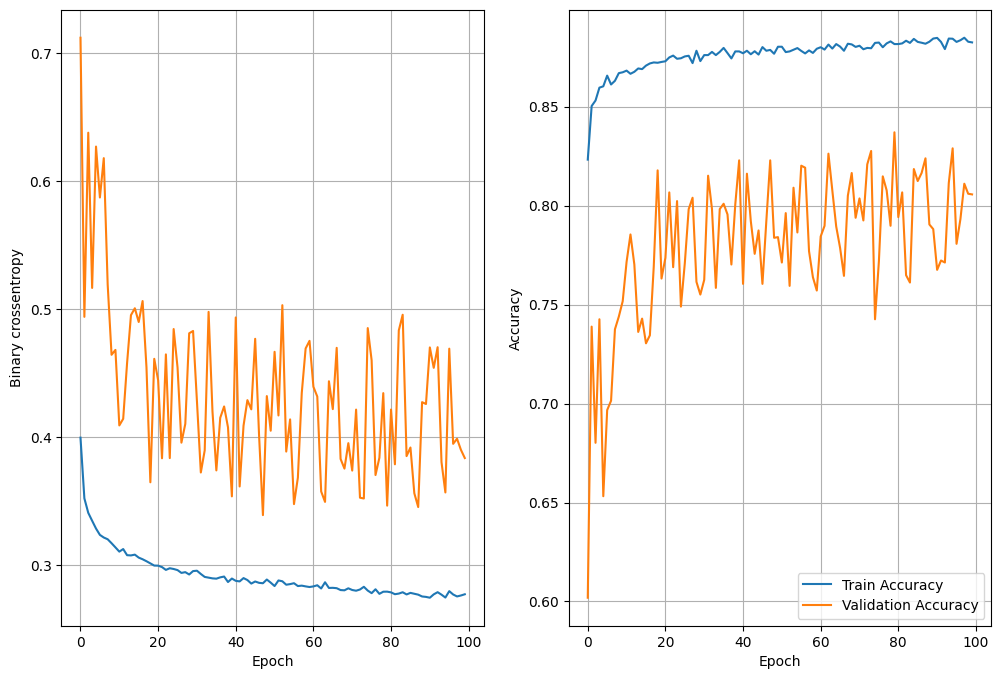

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8636 - loss: 0.3338
16 nodes, dropout 0, lr 0.01, batch size 64


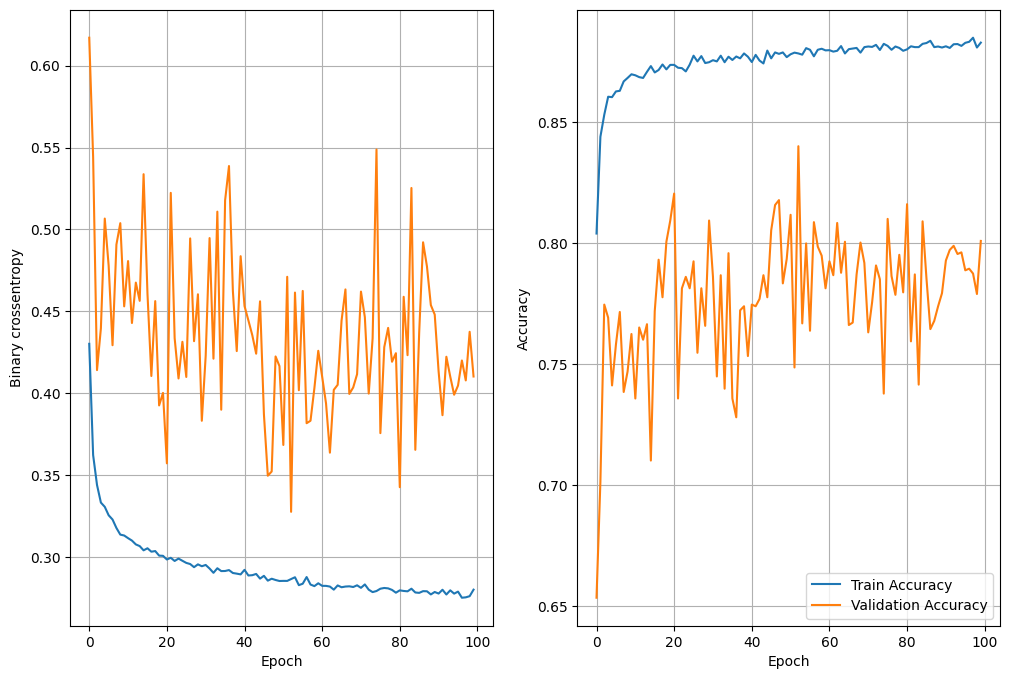

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 751us/step - accuracy: 0.8678 - loss: 0.3340
16 nodes, dropout 0, lr 0.01, batch size 128


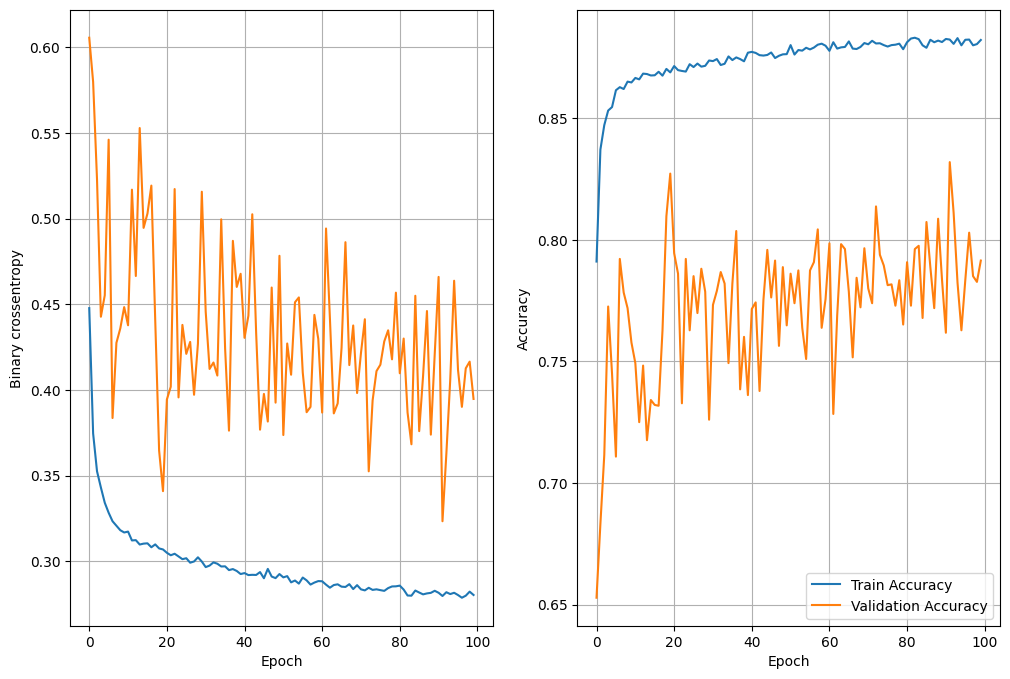

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 744us/step - accuracy: 0.8611 - loss: 0.3481
16 nodes, dropout 0, lr 0.005, batch size 32


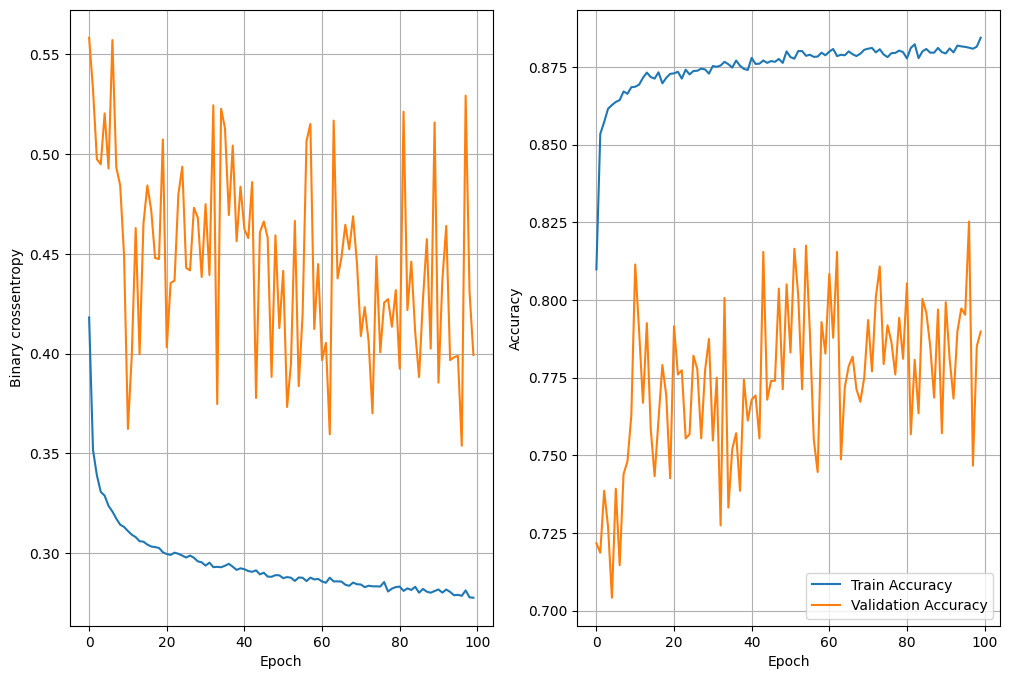

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 894us/step - accuracy: 0.8570 - loss: 0.3459
16 nodes, dropout 0, lr 0.005, batch size 64


119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 751us/step - accuracy: 0.8724 - loss: 0.3177
16 nodes, dropout 0, lr 0.005, batch size 128


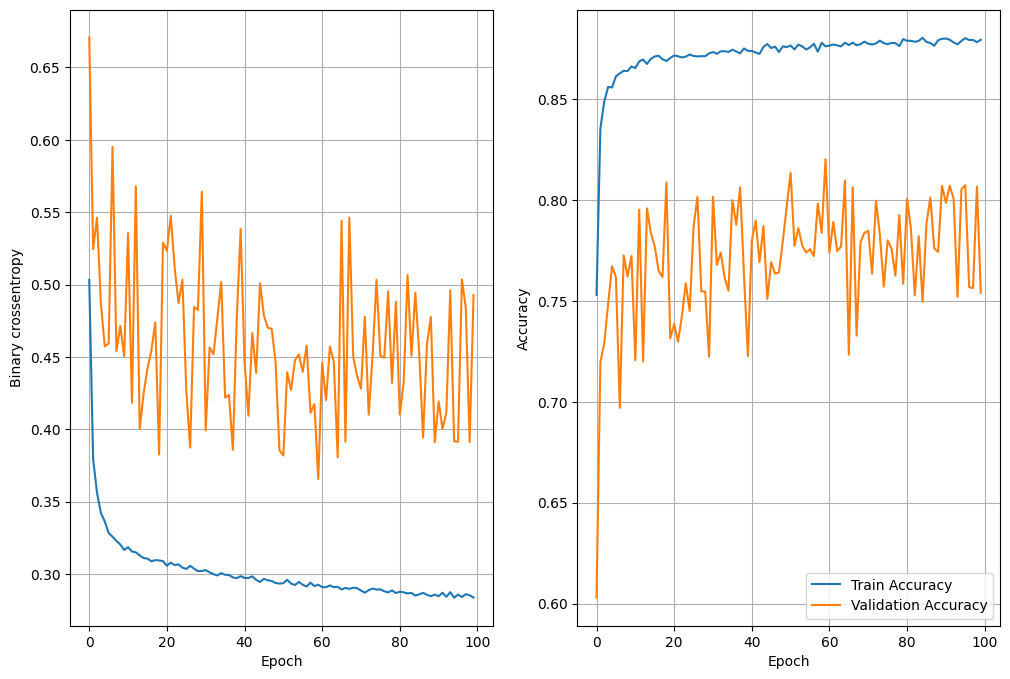

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 750us/step - accuracy: 0.8665 - loss: 0.3354
16 nodes, dropout 0, lr 0.001, batch size 32


119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 795us/step - accuracy: 0.8590 - loss: 0.3458
16 nodes, dropout 0, lr 0.001, batch size 64


119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 762us/step - accuracy: 0.8662 - loss: 0.3397
16 nodes, dropout 0, lr 0.001, batch size 128


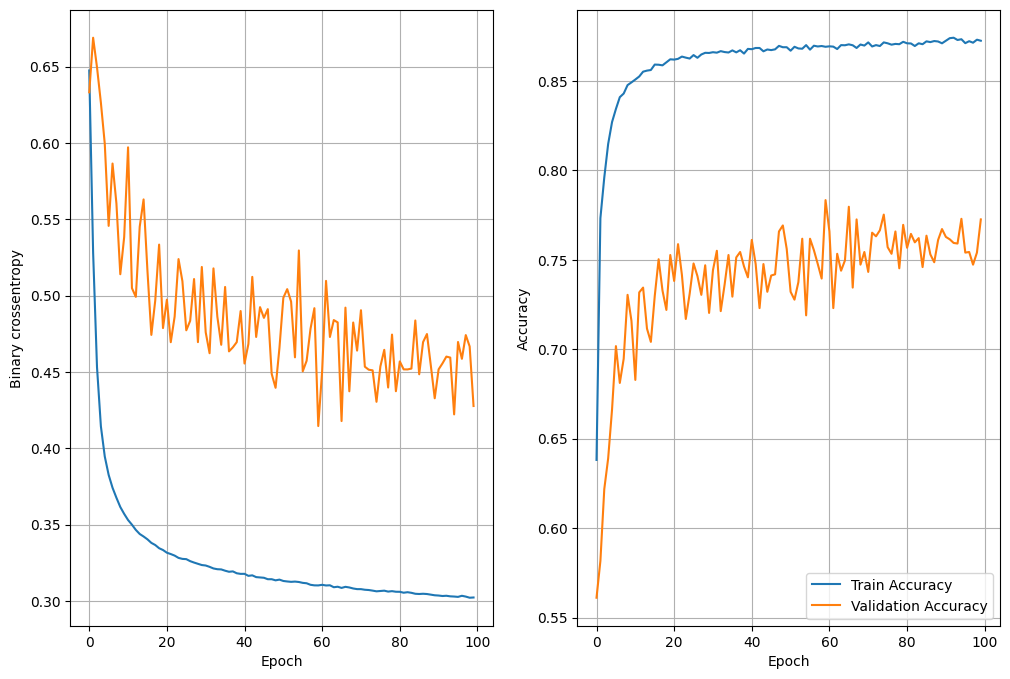

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 747us/step - accuracy: 0.8561 - loss: 0.3348
16 nodes, dropout 0.2, lr 0.01, batch size 32


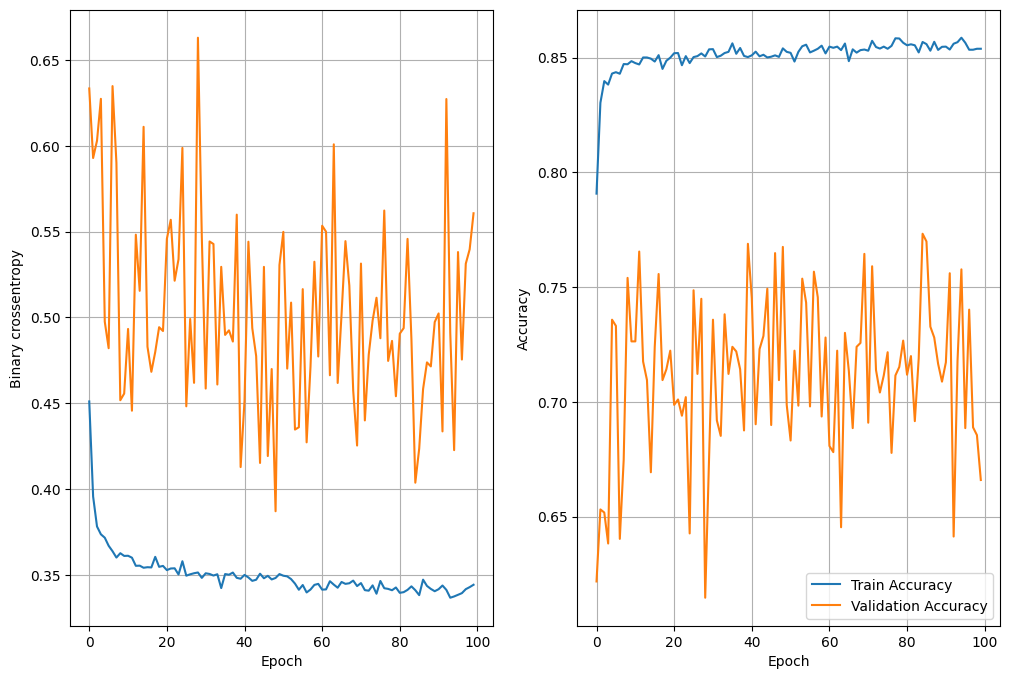

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 937us/step - accuracy: 0.8440 - loss: 0.3487
16 nodes, dropout 0.2, lr 0.01, batch size 64


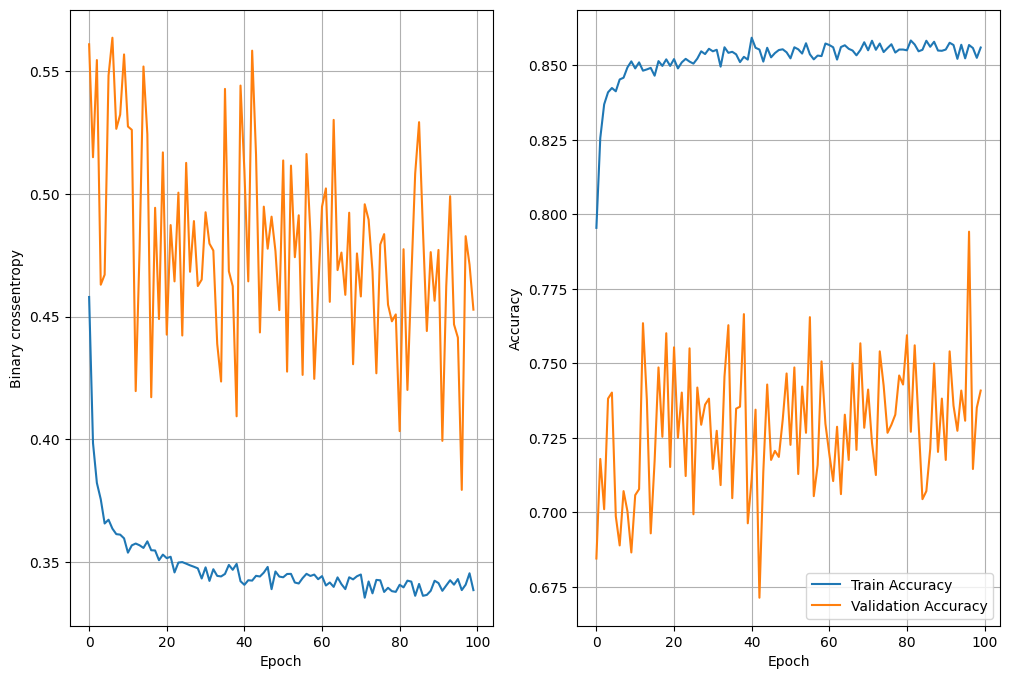

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 849us/step - accuracy: 0.8607 - loss: 0.3335
16 nodes, dropout 0.2, lr 0.01, batch size 128


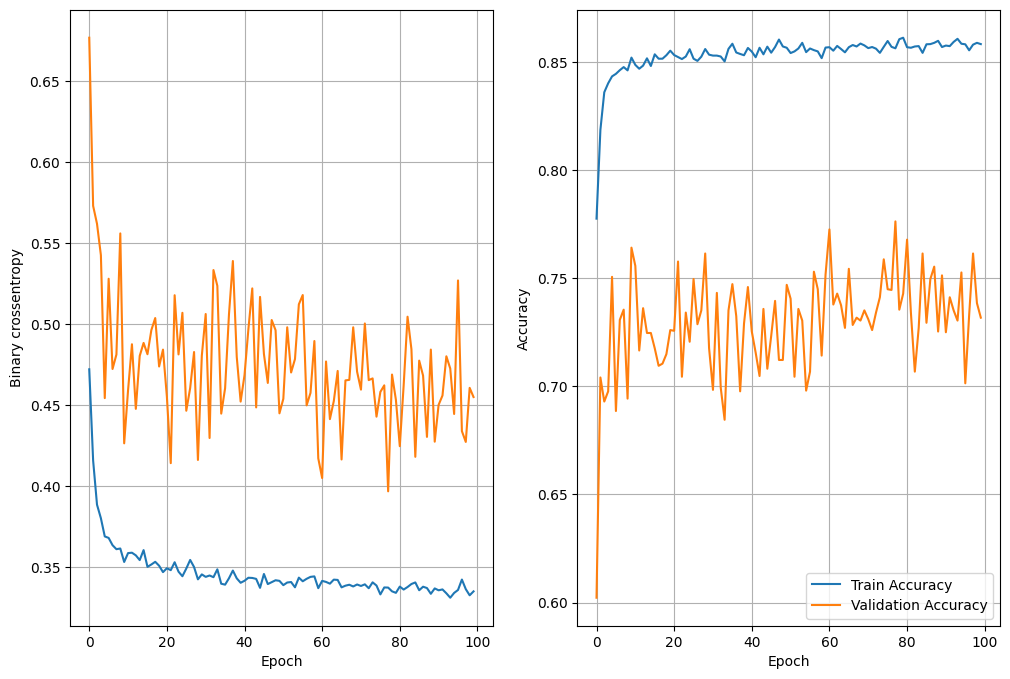

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 906us/step - accuracy: 0.8570 - loss: 0.3245
16 nodes, dropout 0.2, lr 0.005, batch size 32


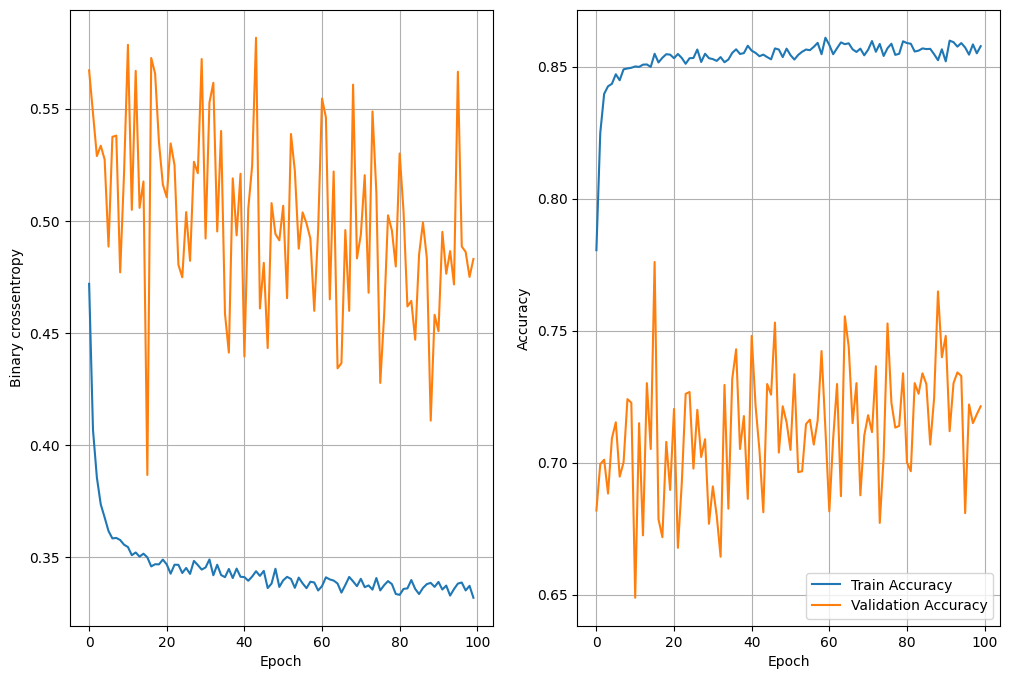

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 804us/step - accuracy: 0.8570 - loss: 0.3316
16 nodes, dropout 0.2, lr 0.005, batch size 64


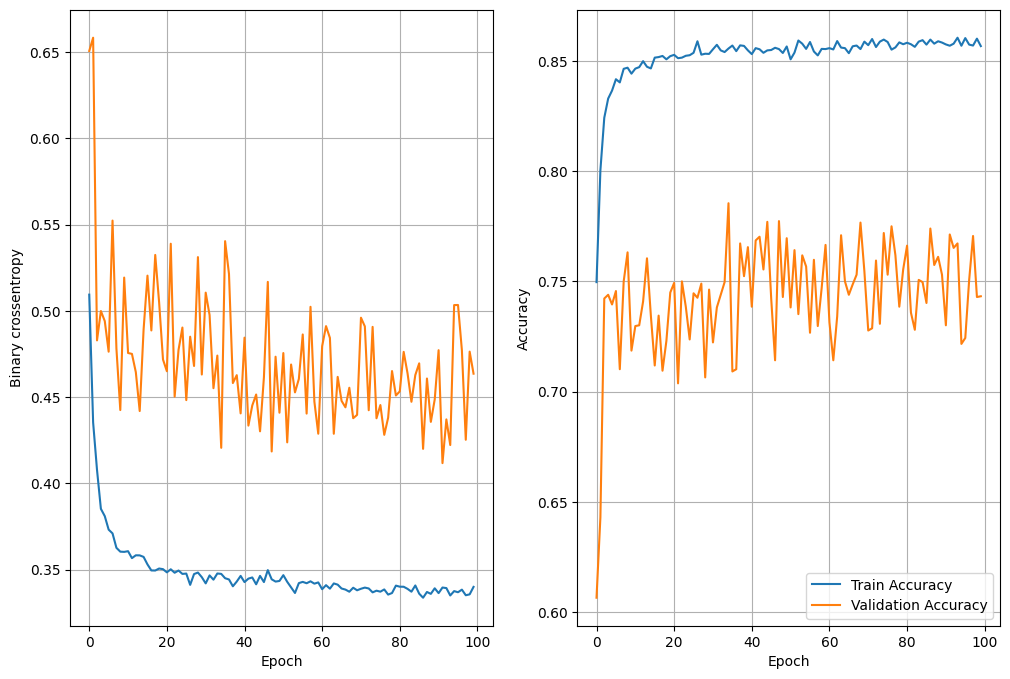

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 745us/step - accuracy: 0.8610 - loss: 0.3219
16 nodes, dropout 0.2, lr 0.005, batch size 128


119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 903us/step - accuracy: 0.8643 - loss: 0.3260
16 nodes, dropout 0.2, lr 0.001, batch size 32


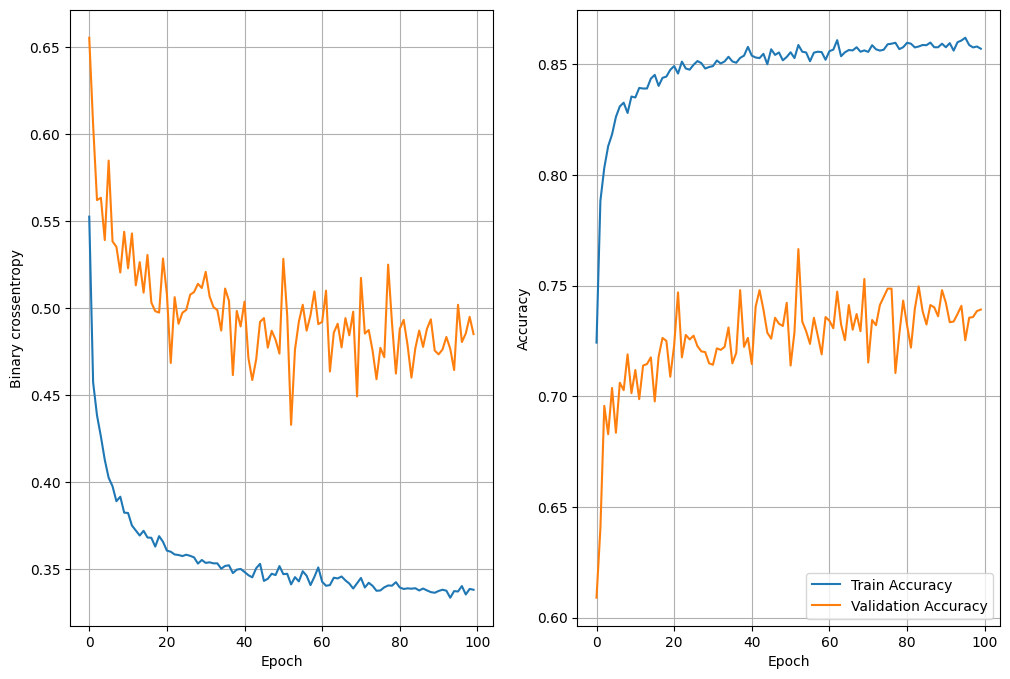

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 758us/step - accuracy: 0.8667 - loss: 0.3247
16 nodes, dropout 0.2, lr 0.001, batch size 64


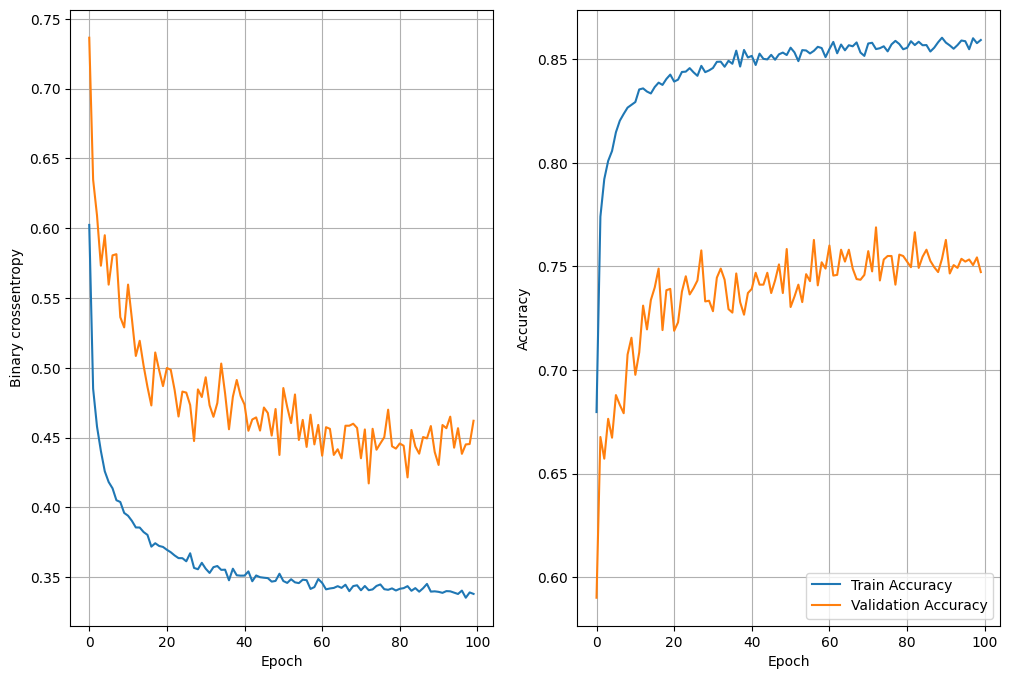

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 763us/step - accuracy: 0.8623 - loss: 0.3264
16 nodes, dropout 0.2, lr 0.001, batch size 128


119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 821us/step - accuracy: 0.8566 - loss: 0.3310
32 nodes, dropout 0, lr 0.01, batch size 32


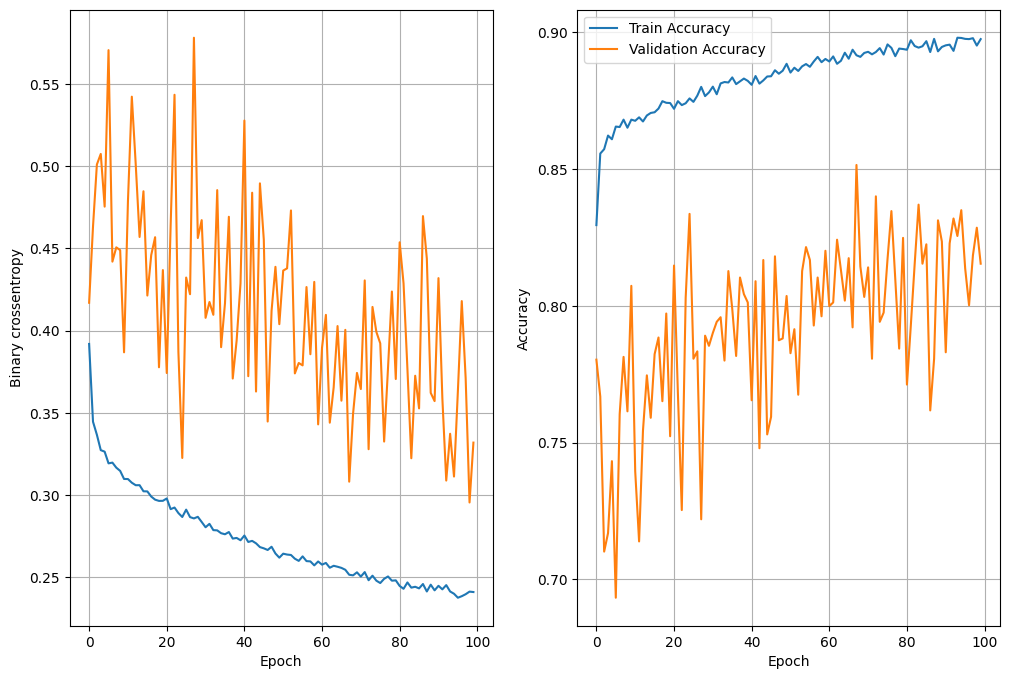

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 897us/step - accuracy: 0.8602 - loss: 0.3771
32 nodes, dropout 0, lr 0.01, batch size 64


119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 889us/step - accuracy: 0.8608 - loss: 0.3881
32 nodes, dropout 0, lr 0.01, batch size 128


119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 687us/step - accuracy: 0.8536 - loss: 0.4444
32 nodes, dropout 0, lr 0.005, batch size 32


119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 712us/step - accuracy: 0.8555 - loss: 0.3927
32 nodes, dropout 0, lr 0.005, batch size 64


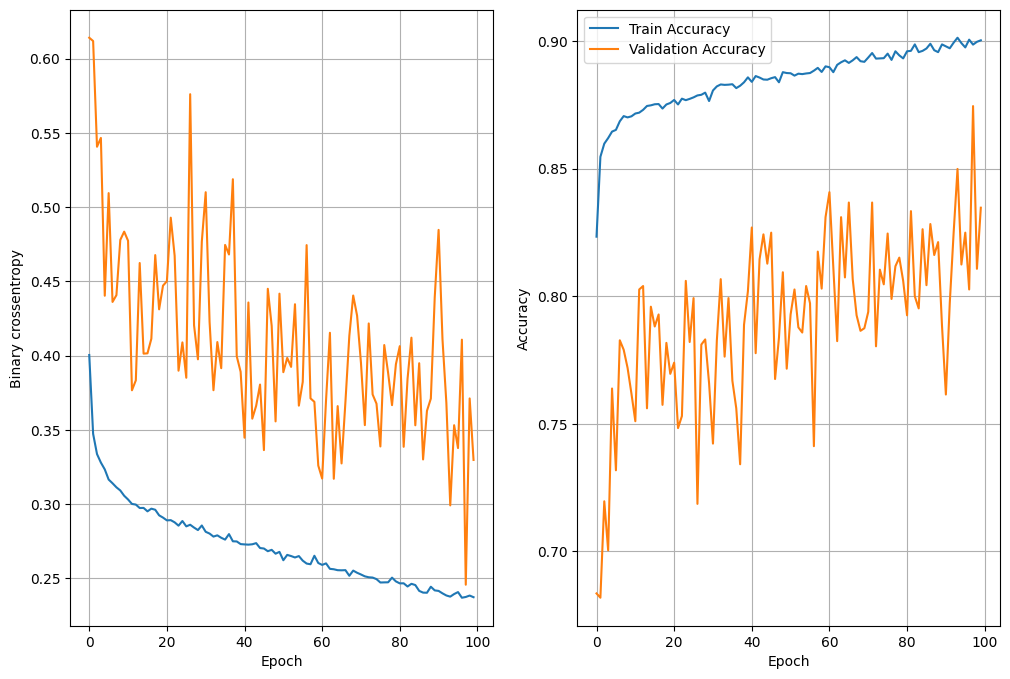

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 761us/step - accuracy: 0.8534 - loss: 0.3977
32 nodes, dropout 0, lr 0.005, batch size 128


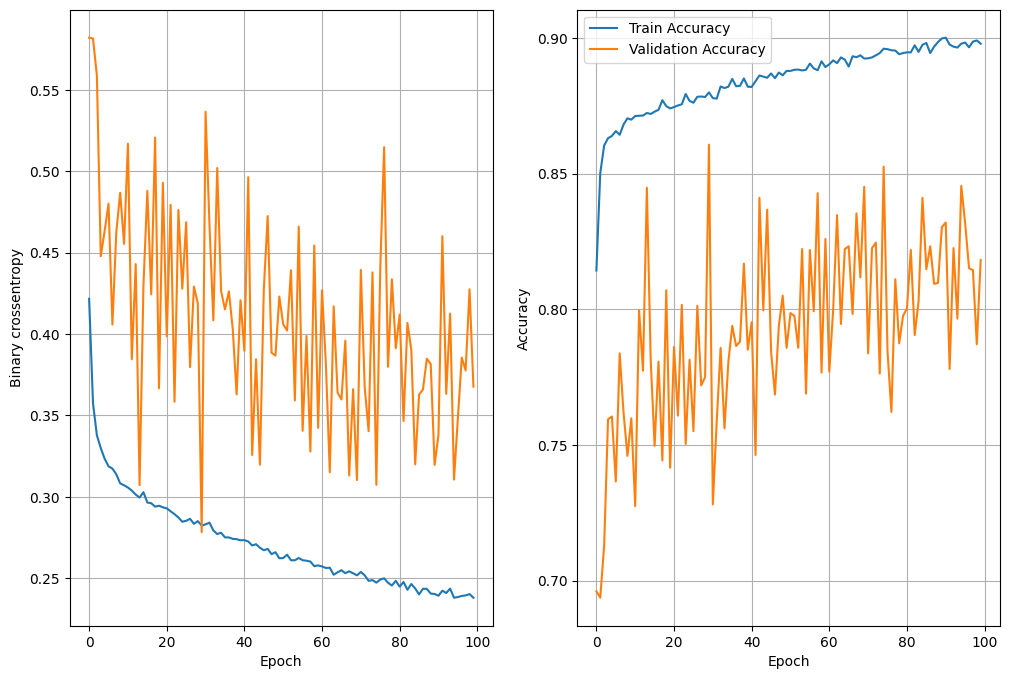

119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8589 - loss: 0.3857
32 nodes, dropout 0, lr 0.001, batch size 32


119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 797us/step - accuracy: 0.8660 - loss: 0.3325
32 nodes, dropout 0, lr 0.001, batch size 64


119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 857us/step - accuracy: 0.8713 - loss: 0.3298
32 nodes, dropout 0, lr 0.001, batch size 128


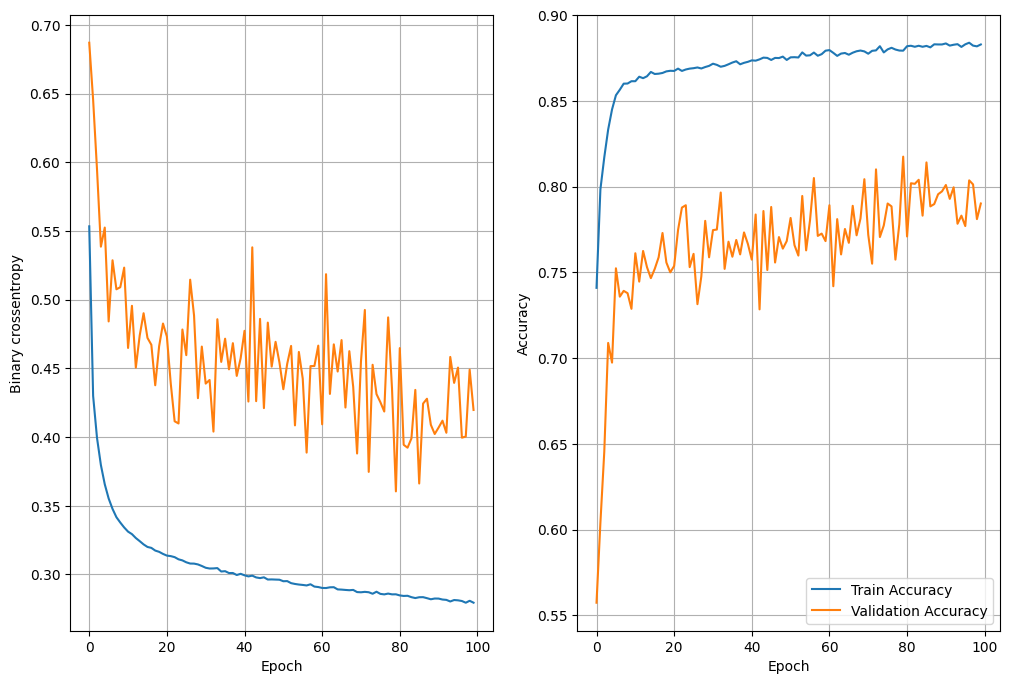

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8610 - loss: 0.3351
32 nodes, dropout 0.2, lr 0.01, batch size 32


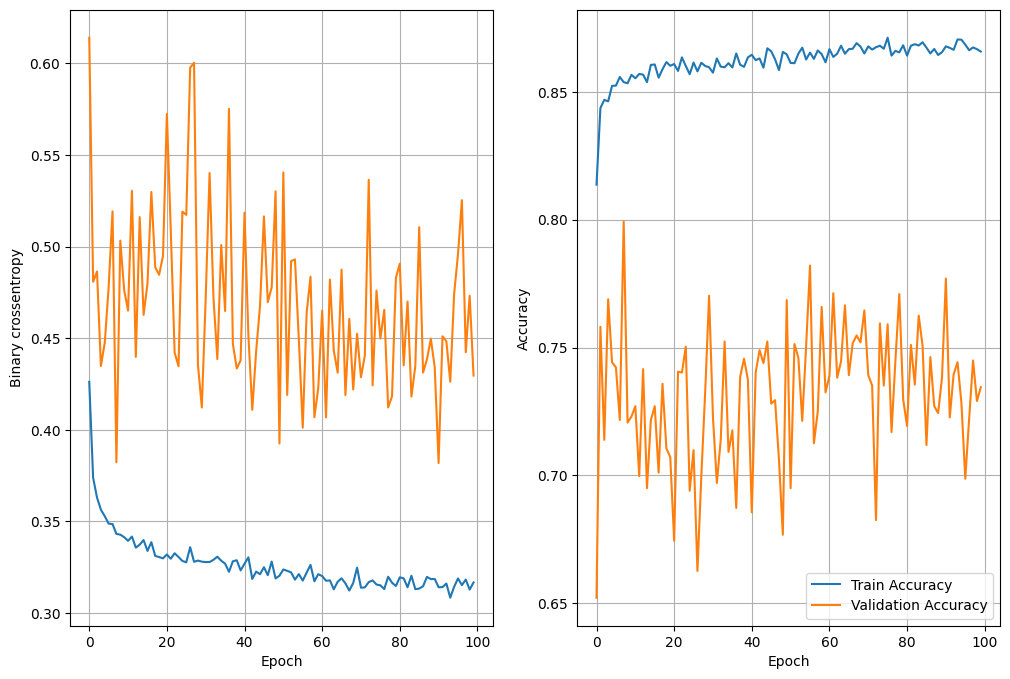

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 893us/step - accuracy: 0.8557 - loss: 0.3316
32 nodes, dropout 0.2, lr 0.01, batch size 64


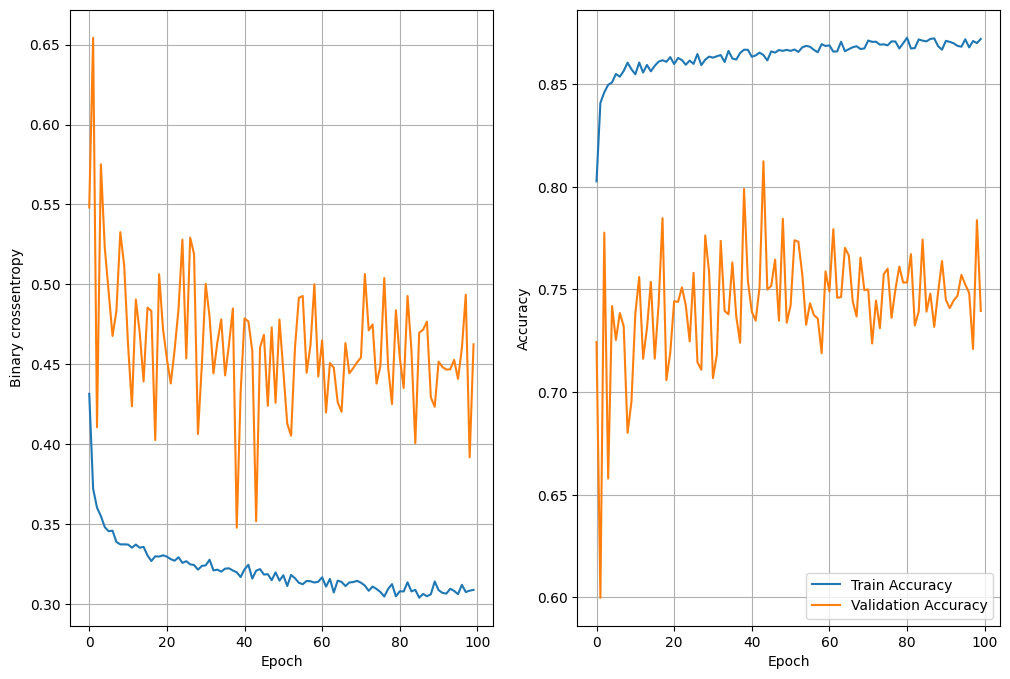

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8628 - loss: 0.3244
32 nodes, dropout 0.2, lr 0.01, batch size 128


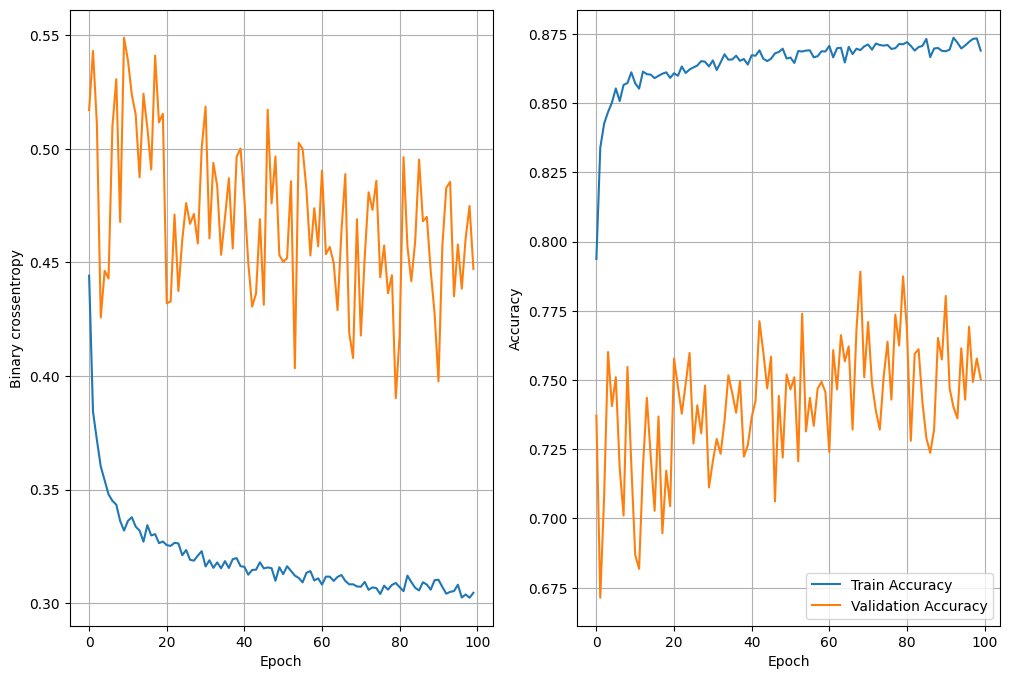

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8676 - loss: 0.3211
32 nodes, dropout 0.2, lr 0.005, batch size 32


119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 990us/step - accuracy: 0.8659 - loss: 0.3269
32 nodes, dropout 0.2, lr 0.005, batch size 64


119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 744us/step - accuracy: 0.8680 - loss: 0.3221
32 nodes, dropout 0.2, lr 0.005, batch size 128


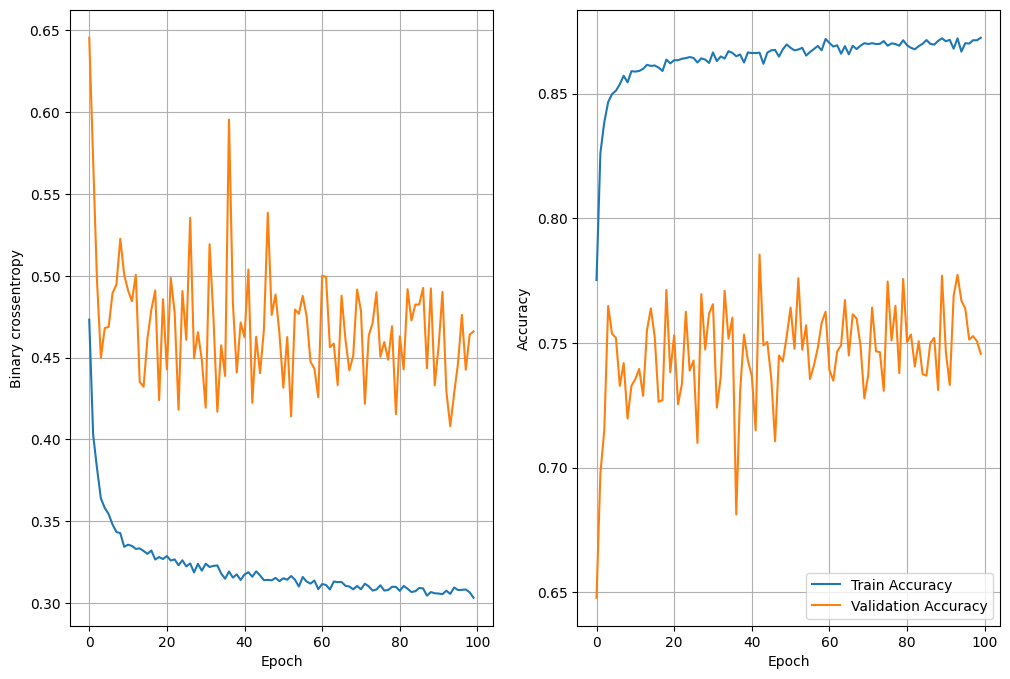

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 705us/step - accuracy: 0.8667 - loss: 0.3216
32 nodes, dropout 0.2, lr 0.001, batch size 32


119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 850us/step - accuracy: 0.8679 - loss: 0.3218
32 nodes, dropout 0.2, lr 0.001, batch size 64


119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 765us/step - accuracy: 0.8706 - loss: 0.3155
32 nodes, dropout 0.2, lr 0.001, batch size 128


119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 867us/step - accuracy: 0.8682 - loss: 0.3176
64 nodes, dropout 0, lr 0.01, batch size 32


119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8636 - loss: 0.5186
64 nodes, dropout 0, lr 0.01, batch size 64


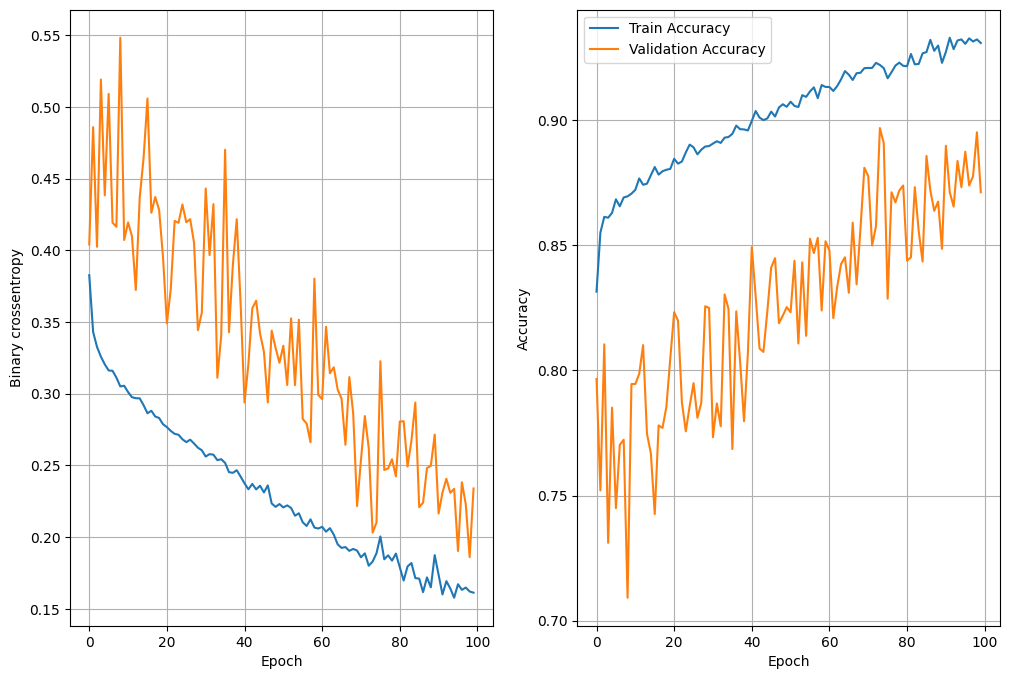

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8463 - loss: 0.6905
64 nodes, dropout 0, lr 0.01, batch size 128


119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8325 - loss: 0.6950  
64 nodes, dropout 0, lr 0.005, batch size 32


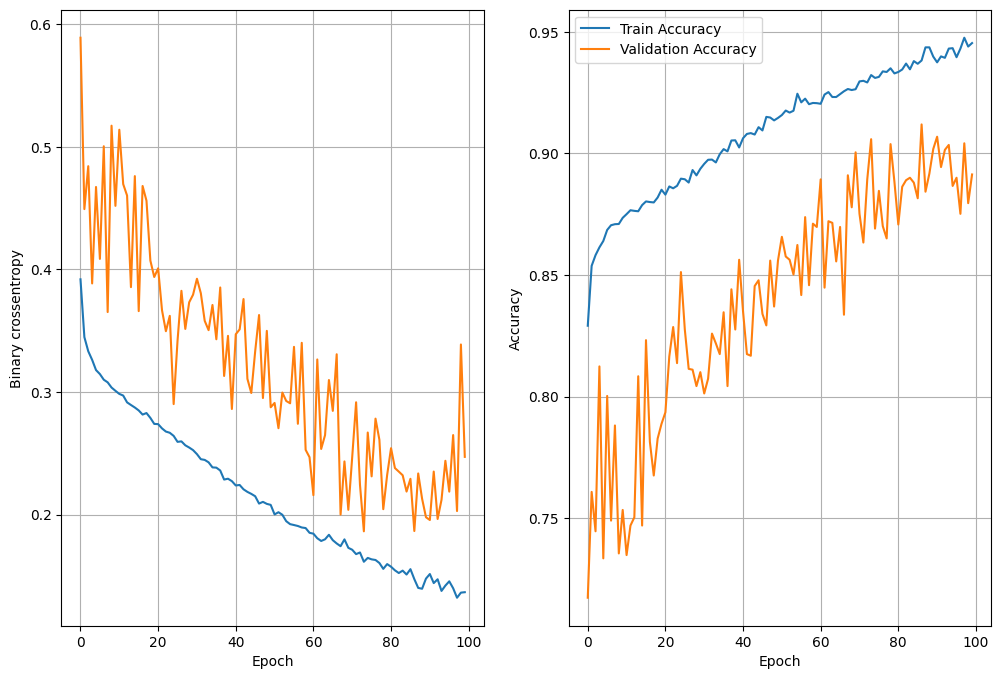

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 721us/step - accuracy: 0.8503 - loss: 0.7098
64 nodes, dropout 0, lr 0.005, batch size 64


119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 818us/step - accuracy: 0.8426 - loss: 0.6597
64 nodes, dropout 0, lr 0.005, batch size 128


119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8478 - loss: 0.5339  
64 nodes, dropout 0, lr 0.001, batch size 32


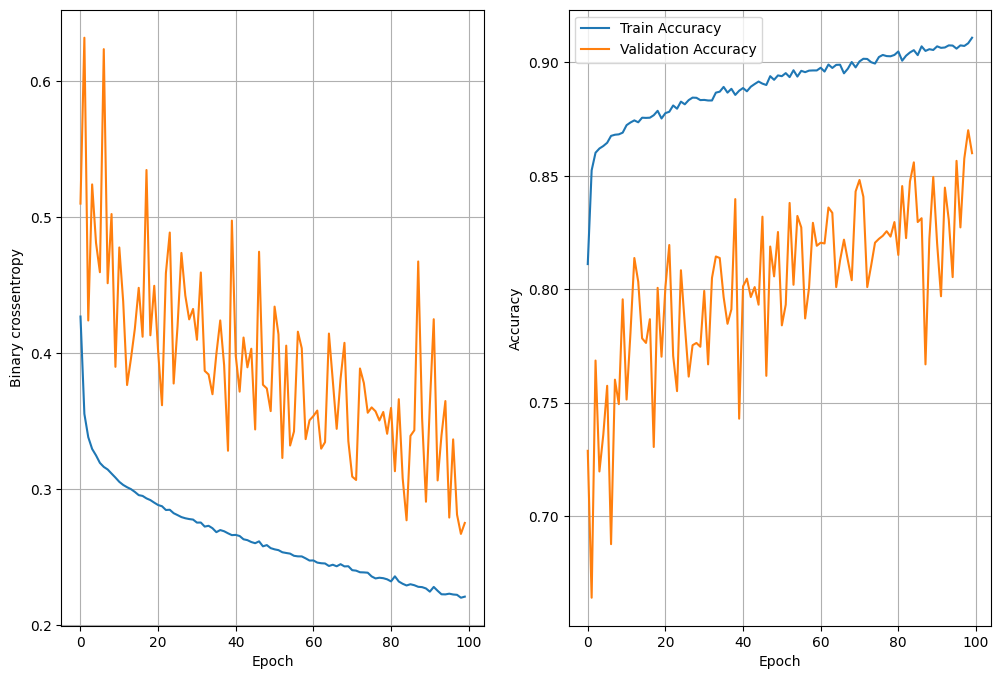

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 716us/step - accuracy: 0.8568 - loss: 0.3815
64 nodes, dropout 0, lr 0.001, batch size 64


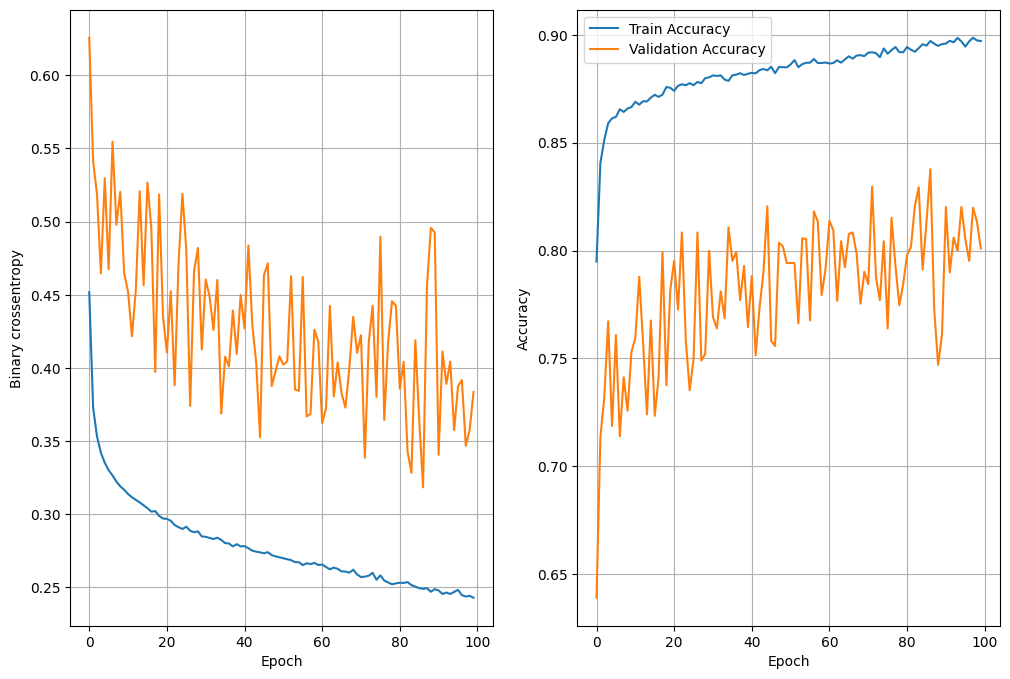

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 931us/step - accuracy: 0.8624 - loss: 0.3536
64 nodes, dropout 0, lr 0.001, batch size 128


119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8619 - loss: 0.3451
64 nodes, dropout 0.2, lr 0.01, batch size 32


119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8597 - loss: 0.3368
64 nodes, dropout 0.2, lr 0.01, batch size 64


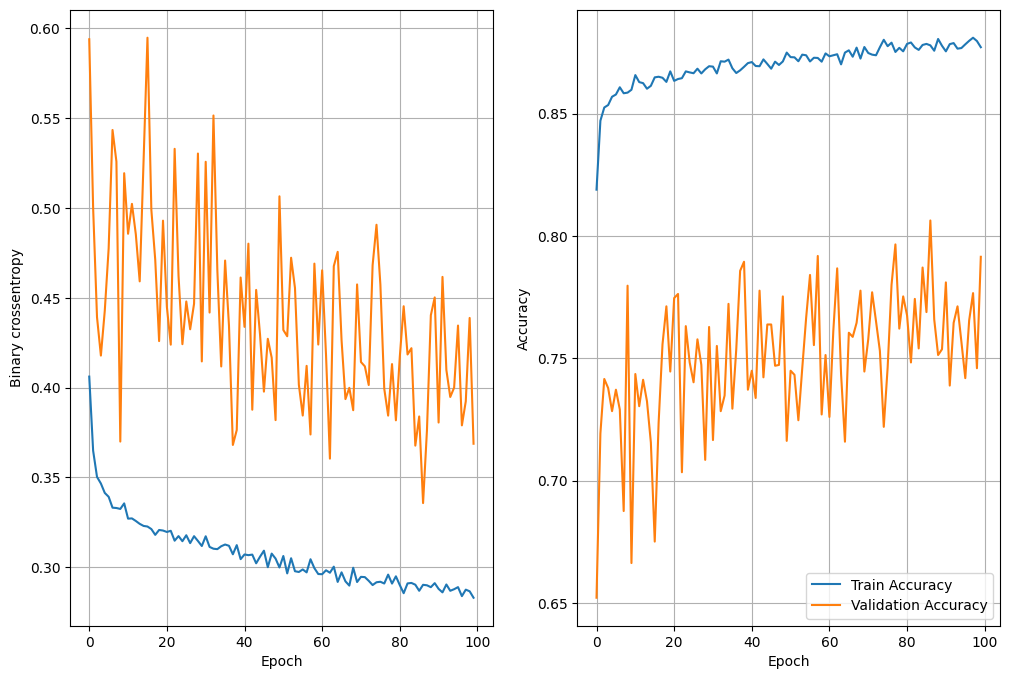

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 693us/step - accuracy: 0.8666 - loss: 0.3440
64 nodes, dropout 0.2, lr 0.01, batch size 128


119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 710us/step - accuracy: 0.8709 - loss: 0.3268
64 nodes, dropout 0.2, lr 0.005, batch size 32


119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 841us/step - accuracy: 0.8734 - loss: 0.3174
64 nodes, dropout 0.2, lr 0.005, batch size 64


119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8723 - loss: 0.3237
64 nodes, dropout 0.2, lr 0.005, batch size 128


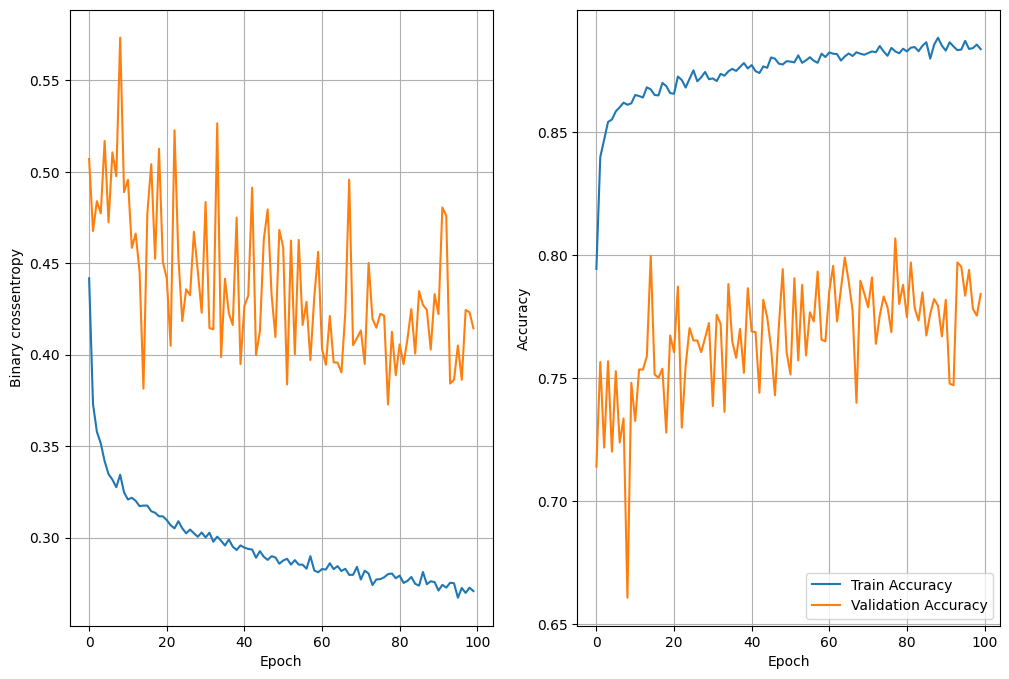

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 910us/step - accuracy: 0.8697 - loss: 0.3216
64 nodes, dropout 0.2, lr 0.001, batch size 32


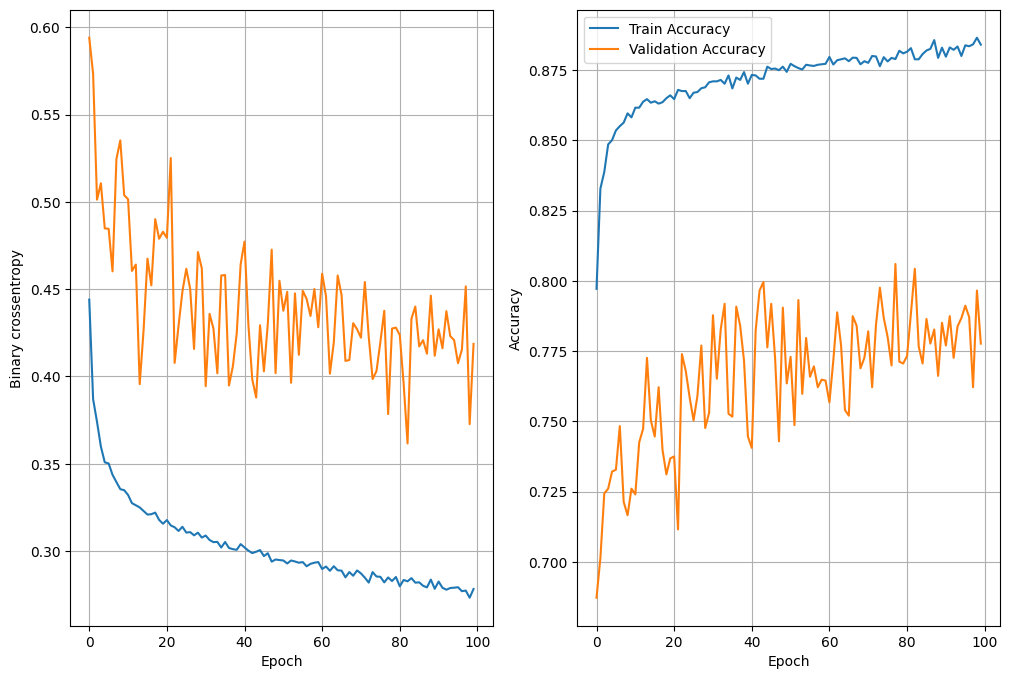

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8781 - loss: 0.3081
64 nodes, dropout 0.2, lr 0.001, batch size 64


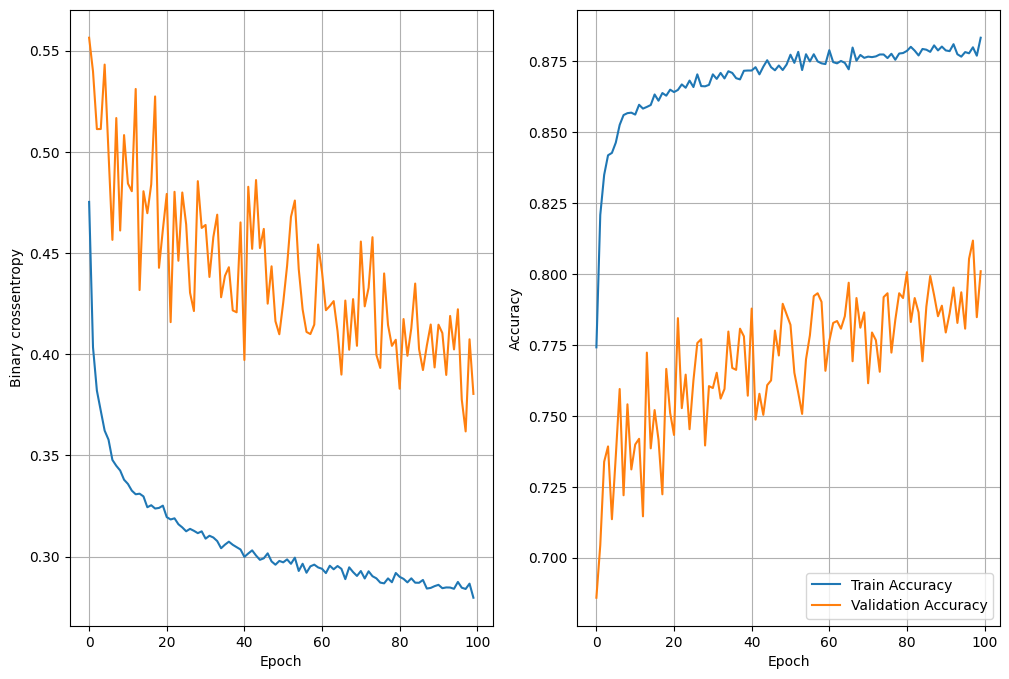

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 901us/step - accuracy: 0.8735 - loss: 0.3174
64 nodes, dropout 0.2, lr 0.001, batch size 128


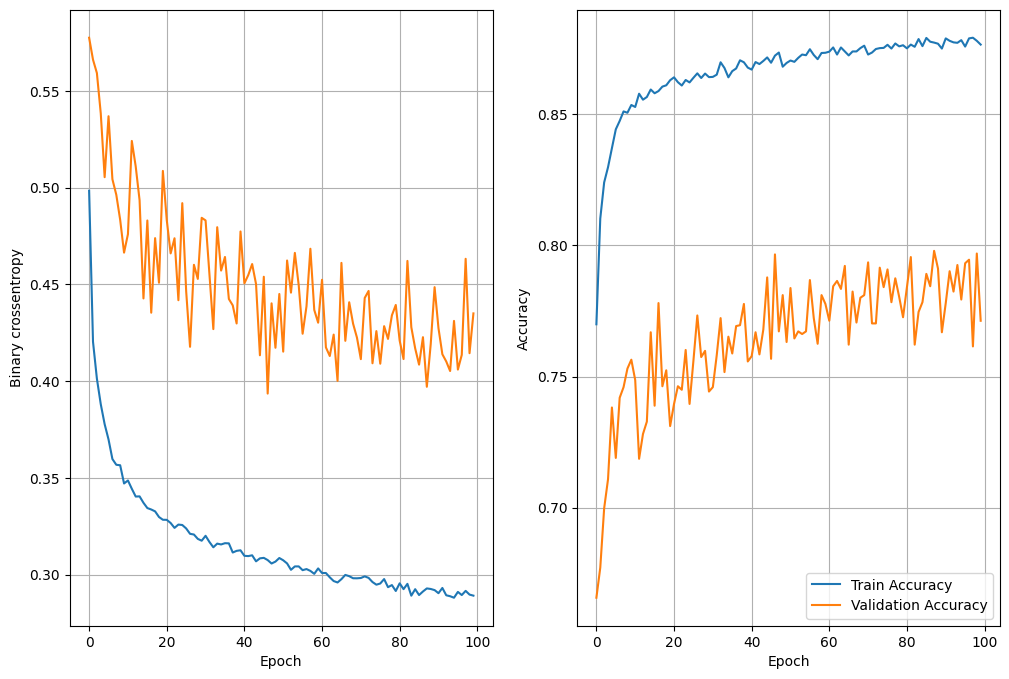

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8702 - loss: 0.3126


In [66]:
least_val_loss = float('inf')
least_loss_model = None
epochs = 100

for num_nodes in [16,32,64]:
    for dropout_prop in [0, 0.2]:
        for lr in [0.01, 0.005, 0.001]:
            for batch_size in [32,64,128]:
                print(f"{num_nodes} nodes, dropout {dropout_prop}, lr {lr}, batch size {batch_size}")
                model, history = train_model(X_train, y_train, num_nodes, dropout_prop, lr, batch_size, epochs)
                plot_history(history)
                val_loss = model.evaluate(X_valid, y_valid)[0]
                if val_loss < least_val_loss:
                    least_val_loss = val_loss
                    least_loss_model = model


In [67]:
y_pred = least_loss_model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int).reshape(-1,)

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 729us/step


In [68]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.75      0.82      1346
           1       0.88      0.95      0.91      2458

    accuracy                           0.88      3804
   macro avg       0.88      0.85      0.86      3804
weighted avg       0.88      0.88      0.88      3804

